In [ ]:
# Mecab 형태소 분석
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 545 kB/s 
     |████████████████████████████████| 465 kB 59.1 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-12-05 07:32:33--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bi

In [ ]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import files
files.upload();

Saving ratings_test.txt to ratings_test.txt
Saving ratings_train.txt to ratings_train.txt


In [ ]:
train = pd.read_table('ratings_train.txt')
test = pd.read_table('ratings_test.txt')

In [ ]:
train = train[['document','label']]
test = test[['document','label']]

In [ ]:
train

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0
149996,평점이 너무 낮아서...,1
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
test

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
# 중복값 확인 

print(train.document.duplicated().sum())
print(test.document.duplicated().sum())

3817
842


In [ ]:
# 중복값 제거

train.drop_duplicates(subset=['document'], inplace=True)
print('총 샘플의 수 :',len(train))

test.drop_duplicates(subset=['document'], inplace=True)
print('총 샘플의 수 :',len(test))

총 샘플의 수 : 146183
총 샘플의 수 : 49158


In [ ]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

document    1
label       0
dtype: int64
document    1
label       0
dtype: int64


In [ ]:
train = train.dropna()
print(train.isnull().sum())
print(len(train))

document    0
label       0
dtype: int64
146182


In [ ]:
# 데이터 정제 - 한글 제외하고 모두 제거
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train['document'].replace('', np.nan, inplace=True)
train = train.dropna(how='any')
print('전처리 후 train 개수 :',len(train))


test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 
test['document'].replace('', np.nan, inplace=True) 
test = test.dropna(how='any') # Null 값 제거
print('전처리 후 test 개수 :',len(test))

<ipython-input-13-d306e074fbf7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


전처리 후 train 개수 : 145791
전처리 후 test 개수 : 48995


<ipython-input-13-d306e074fbf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-13-d306e074fbf7>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


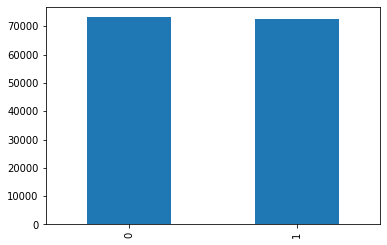

In [ ]:
train['label'].value_counts().plot(kind = 'bar')

In [ ]:
mecab = Mecab()
print(mecab.morphs('아 더빙 진짜 짜증나네요 목소리'))

['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']


In [ ]:
# 불용어 지정 후 제거
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를',
             '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '나']

train['tokenized'] = train['document'].apply(mecab.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test['tokenized'] = test['document'].apply(mecab.morphs)
test['tokenized'] = test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-15-8095df4dd246>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['tokenized'] = test['document'].apply(mecab.morphs)
<ipython-input-15-8095df4dd246>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['tokenized'] = test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [ ]:
# 단어 길이 분포 확인하기

negative_words = np.hstack(train[train.label == 0]['tokenized'].values)
positive_words = np.hstack(train[train.label == 1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('영화', 27941), ('보', 12377), ('없', 10949), ('만', 7216), ('안', 6689), ('있', 6102), ('는데', 5671), ('로', 5604), ('너무', 5091), ('거', 4920), ('기', 4903), ('었', 4834), ('점', 4759), ('으로', 4720), ('어', 4695), ('음', 4651), ('아', 4554), ('것', 4460), ('같', 4331), ('진짜', 4289)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('영화', 29384), ('보', 13079), ('있', 10570), ('좋', 9709), ('재밌', 7353), ('었', 7326), ('봤', 6554), ('정말', 6461), ('네요', 6070), ('적', 6068), ('너무', 5894), ('최고', 5813), ('는데', 5765), ('지만', 5191), ('없', 4834), ('것', 4797), ('잘', 4699), ('어요', 4677), ('수', 4625), ('으로', 4583)]


긍정 리뷰의 평균 길이 : 11.979651402924251
부정 리뷰의 평균 길이 : 12.397665295187064


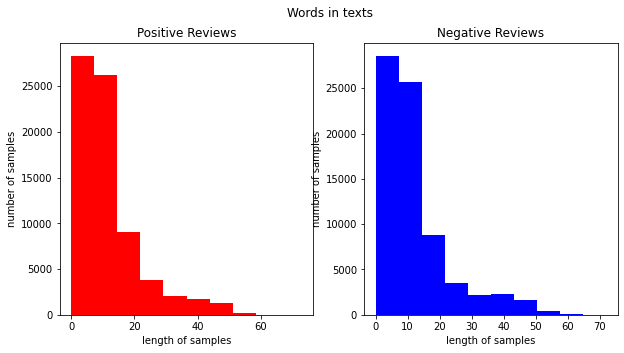

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train[train['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train[train['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

부정 리뷰와 긍정 리뷰의 길이는 큰 차이가 없다

In [ ]:
# 정수 인코딩

X_train = train['tokenized'].values
y_train = train['label'].values
X_test= test['tokenized'].values
y_test = test['label'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 49941
등장 빈도가 1번 이하인 희귀 단어의 수: 21313
단어 집합에서 희귀 단어의 비율: 42.676358102561025
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1993094390542827


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2

vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 28630


In [ ]:
# 정수 시퀀스 변환, OOV 변환

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])
print(X_test[:3])

[[19, 57, 887, 25, 205, 20, 691], [969, 473, 483, 628, 2, 101, 1546, 38, 858, 941, 29, 355], [10, 183, 1]]
[[780, 118], [68, 99, 43, 890, 305, 29, 23, 30, 589, 3393, 54, 847], [79, 29, 208, 115, 319, 128, 40, 3, 28]]


리뷰의 최대 길이 : 73
리뷰의 평균 길이 : 12.189408125330095


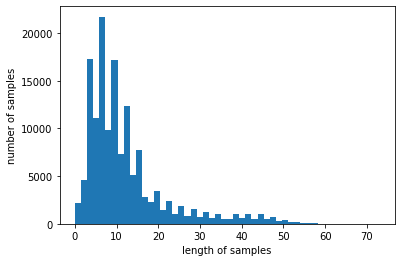

In [ ]:
# 패딩

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.96913389715415


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# 리뷰 감성분류

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1823/1823 [==============================] - ETA: 0s - loss: 0.3860 - acc: 0.8250
Epoch 1: val_acc improved from -inf to 0.84999, saving model to best_model.h5
1823/1823 [==============================] - 459s 250ms/step - loss: 0.3860 - acc: 0.8250 - val_loss: 0.3420 - val_acc: 0.8500
Epoch 2/15
1823/1823 [==============================] - ETA: 0s - loss: 0.2891 - acc: 0.8775
Epoch 2: val_acc improved from 0.84999 to 0.85740, saving model to best_model.h5
1823/1823 [==============================] - 453s 249ms/step - loss: 0.2891 - acc: 0.8775 - val_loss: 0.3264 - val_acc: 0.8574
Epoch 3/15
1823/1823 [==============================] - ETA: 0s - loss: 0.2356 - acc: 0.9028
Epoch 3: val_acc did not improve from 0.85740
1823/1823 [==============================] - 453s 249ms/step - loss: 0.2356 - acc: 0.9028 - val_loss: 0.3422 - val_acc: 0.8545
Epoch 4/15
1823/1823 [==============================] - ETA: 0s - loss: 0.1950 - acc: 0.9214
Epoch 4: val_acc did not improve from 0.85

In [ ]:
Model = load_model('best_model.h5')
print("\n 테스트 정확도: %.3f" % (Model.evaluate(X_test, y_test)[1]))

1532/1532 [==============================] - 34s 22ms/step - loss: 0.3348 - acc: 0.8536

 테스트 정확도: 0.8536


In [ ]:
# 리뷰 예측

def review_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(Model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
review_predict('액션이 퇴보하고 있다') # 별점 3

1/1 [==============================] - 0s 29ms/step
87.61% 확률로 부정 리뷰입니다.


In [ ]:
review_predict('채드윅 보스만.. 그립다')  # 별점 6

1/1 [==============================] - 0s 24ms/step
80.20% 확률로 부정 리뷰입니다.


In [ ]:
review_predict('개졸려요 각오하고 가세요') # 별점 6

1/1 [==============================] - 0s 27ms/step
89.55% 확률로 부정 리뷰입니다.


In [ ]:
review_predict('아쉽다...액션이...') # 별점 7

1/1 [==============================] - 0s 24ms/step
58.53% 확률로 부정 리뷰입니다.


In [ ]:
review_predict('보스만의 부재가 너무 크다.') # 별점 6

1/1 [==============================] - 0s 28ms/step
91.74% 확률로 부정 리뷰입니다.


In [ ]:
review_predict('히어로 영화인데 슈리의블랙팬서는 히어로의 강함이 느껴지지 않으니 불호평이 나올수밖에.. 와칸다영웅주의에 빠져있는 스토리와 연출이 아쉬웠고 오스트만 남는 영화. 채드윅보스만이 그립다')

1/1 [==============================] - 0s 21ms/step
63.78% 확률로 긍정 리뷰입니다.


In [ ]:
review_predict('역시 마블 최고 간지는 블랙팬서다') # 별점 10

1/1 [==============================] - 0s 29ms/step
98.61% 확률로 긍정 리뷰입니다.


In [ ]:
review_predict('엔드게임이후 블위, 이터널스, 닥스2, 토르4(사상 최악의 영화)까지 다 실망 밖에 없었고 블팬1도 재미없게봐서 기대를 안하고 봤는데 정말 재미있었다. 채드윅 보스만을 위한 헌사가 많이 느껴졌고 액션도 만족스러웠다. 다만 아쉬운 점은 빌런의 매력과 초반에 조금 루스한 부분? 그래도 엔드게임이후 마블 영화중 단연 최고라고 말할수있다.')

1/1 [==============================] - 0s 24ms/step
93.12% 확률로 긍정 리뷰입니다.


In [ ]:
review_predict('솔직히 올해 나온 마블중에 최고였음...연출도 너무 좋고 OST며 수중 전투씬 등 기승전결 다 좋았던거 같음...채드윅 제대로 추모한 느낌...ㅠ_ㅠ 슈리도 울고 나도 찡하고...') # 별점 10

1/1 [==============================] - 0s 28ms/step
99.79% 확률로 긍정 리뷰입니다.


In [ ]:
review_predict('생각보다 재밌음!!!') # 별점 10

1/1 [==============================] - 0s 23ms/step
98.74% 확률로 긍정 리뷰입니다.
